# Day 3: Exploratory Data Analysis (EDA) and Visualization of Indian Food Dataset

## Overview
This documentation provides a detailed explanation of the exploratory data analysis (EDA) performed on the cleaned Indian food dataset. The analysis aims to understand the dataset's structure, identify patterns, and extract meaningful insights about Indian food recipes.

## Dataset Background
The dataset contains information about Indian food recipes, including recipe names, descriptions, cuisine types, cooking times, ingredients, and instructions. The data was previously cleaned and preprocessed in the Day-2 notebook, where non-English text was translated and time columns were standardized.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Cell 1: Imports & options
import pandas as pd
import numpy as np

# display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', None)


In [4]:
indian_food_df = pd.read_csv("data/cleaned_indian_food.csv")

In [4]:
# Cell: Basic overview
print(indian_food_df.shape)          # rows, cols
indian_food_df.info()                # dtypes & non-null counts
display(indian_food_df.head(5))      # first few rows


(7500, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7500 non-null   object 
 1   description      119 non-null    object 
 2   cuisine          6990 non-null   object 
 3   course           7500 non-null   object 
 4   diet             7500 non-null   object 
 5   prep_time        7500 non-null   int64  
 6   ingredients      7494 non-null   object 
 7   instructions     6990 non-null   object 
 8   n_ingredients    7500 non-null   int64  
 9   cook_time        7381 non-null   float64
 10  total_time       7500 non-null   float64
 11  ingredient_list  7500 non-null   object 
 12  ingredients_en   7494 non-null   object 
 13  instructions_en  6990 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 820.4+ KB


,name,description,cuisine,course,diet,prep_time,ingredients,instructions,n_ingredients,cook_time,total_time,ingredient_list,ingredients_en,instructions_en
0,Doddapatre Soppina Chitranna Recipe (Spiced In...,Doddapatre Soppina Chitranna (Indian Thyme Ric...,South Indian Recipes,Lunch,Vegetarian,50,1-1/2 cups Cooked rice; 2 tablespoons Oil; 10 ...,To start preparing Doddapatre Soppina Chitrann...,22,NaN,50.0,"['1-1/2 cups Cooked rice', '2 tablespoons Oil'...",1-1/2 cups Cooked rice; 2 tablespoons Oil; 10 ...,To start preparing Doddapatre Soppina Chitrann...
1,Goan Style Mushroom Vindaloo Recipe,Goan Style Mushroom Vindaloo Recipe is a varia...,Goan Recipes,Dinner,Vegetarian,50,250 grams Button mushrooms; cut into quarters;...,To begin making the Goan Style Mushroom Vindal...,18,NaN,50.0,"['250 grams Button mushrooms', 'cut into quart...",250 grams Button mushrooms; cut into quarters;...,To begin making the Goan Style Mushroom Vindal...
2,Assamese Style Walking Catfish In Curry Leaf G...,Assamese Style Walking Catfish In Curry Leaf G...,Assamese,Side Dish,Non Vegeterian,40,5 Walking Catfish; thoroughly cleaned; 4 clove...,To begin making Assamese Style Walking Catfish...,14,NaN,40.0,"['5 Walking Catfish', 'thoroughly cleaned', '4...",5 Walking Catfish; thoroughly cleaned; 4 clove...,To begin making Assamese Style Walking Catfish...
3,Nutty Aloo Paratha Recipe,Nutty Aloo Paratha Recipe is a wonderful twist...,North Indian Recipes,North Indian Breakfast,Vegetarian,55,1 cup Whole Wheat Flour; 1 cup Spinach Leaves ...,"To begin making Nutty Aloo Paratha Recipe,firs...",22,NaN,55.0,"['1 cup Whole Wheat Flour', '1 cup Spinach Lea...",1 cup Whole Wheat Flour; 1 cup Spinach Leaves ...,"To begin making Nutty Aloo Paratha Recipe,firs..."
4,Phulka Recipe (Roti/Chapati) - Puffed Indian B...,Phulkas also known as Roti or Chapati in some ...,North Indian Recipes,Main Course,Vegetarian,40,1 cup Whole Wheat Flour; 1/2 teaspoon Salt; op...,To begin making the Phulka (roti/ chapati) rec...,6,NaN,40.0,"['1 cup Whole Wheat Flour', '1/2 teaspoon Salt...",1 cup Whole Wheat Flour; 1/2 teaspoon Salt; op...,To begin making the Phulka (roti/ chapati) rec...


In [6]:
# Cell: Missing data count
missing = indian_food_df.isnull().sum().sort_values(ascending=False)
display(missing[missing > 0])

description        7381
cuisine             510
instructions_en     510
instructions        510
cook_time           119
ingredients           6
ingredients_en        6
dtype: int64

In [10]:
# Cell: Numeric & categorical summaries
display(indian_food_df.describe(include=[np.number]))
display(indian_food_df.describe(include=['object']).T[['top','freq']])

,prep_time,n_ingredients,cook_time,total_time
count,7500.000000,7500.000000,7381.000000,7500.000000
mean,29.381600,26.460667,31.102967,59.991067
std,80.607531,16.334545,35.180275,88.836919
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,15.000000,20.000000,30.000000
50%,15.000000,26.000000,30.000000,40.000000
75%,20.000000,36.000000,39.000000,55.000000
max,2880.000000,127.000000,900.000000,2925.000000


,top,freq
name,Mustard Vegetable Curry Recipe,3
description,Doddapatre Soppina Chitranna (Indian Thyme Ric...,1
cuisine,Indian,1181
course,Lunch,1793
diet,Vegetarian,4795
ingredients,Chhena; sugar; ghee,4
instructions,To prepare Four Cheese a; d Spi; ach S; uffed ...,2
ingredient_list,[],6
ingredients_en,Chhena; sugar; ghee,4
instructions_en,To prepare Four Cheese a; d Spi; ach S; uffed ...,2


In [11]:
# Cell: Top categories
for col in ['cuisine','course','diet']:
    if col in indian_food_df.columns:
        print(col, indian_food_df[col].value_counts().head(10), '\n')

cuisine cuisine
Indian                   1181
Continental              1021
North Indian Recipes      962
South Indian Recipes      695
Italian Recipes           236
Bengali Recipes           183
Maharashtrian Recipes     183
Kerala Recipes            164
Tamil Nadu                161
Karnataka                 151
Name: count, dtype: int64 

course course
Lunch                     1793
Side Dish                 1026
Snack                      879
Dinner                     787
Dessert                    686
Appetizer                  641
Main Course                319
South Indian Breakfast     268
World Breakfast            260
main course                258
Name: count, dtype: int64 

diet diet
Vegetarian                      4795
High Protein Vegetarian          715
vegetarian                       453
Non Vegeterian                   436
Eggetarian                       346
Diabetic Friendly                267
High Protein Non Vegetarian      230
No Onion No Garlic (Sattvic)      7

In [12]:
# Cell: Most common ingredients
from collections import Counter

def explode_ings(s, sep=','):
    return Counter(s.dropna().str.split(sep).explode().str.strip())
print(explode_ings(indian_food_df['ingredients']).most_common(20))


[('Sal; -; o; as; e', 3531), ('1/2; easpoo; Turmeric powder (Haldi)', 801), ('1; easpoo; Cumi; seeds (Jeera)', 676), ('1; easpoo; Red Chilli powder', 635), ('1 O; io; - fi; ely chopped', 599), ('1; easpoo; Mus; ard seeds', 552), ('1; easpoo; Turmeric powder (Haldi)', 468), ('नमक - स्वाद अनुसार', 465), ('1 sprig Curry leaves', 449), ('1/4; easpoo; Turmeric powder (Haldi)', 395), ('sal; - as per; as; e', 381), ('1/2; easpoo; Red Chilli powder', 361), ('1/2; easpoo; Mus; ard seeds', 351), ('1/2; easpoo; Cumi; seeds (Jeera)', 331), ('1; easpoo; Coria; der Powder (Dha; ia)', 330), ('1; ablespoo; Su; flower Oil', 321), ('1; easpoo; Garam masala powder', 319), ('1 O; io; - chopped', 318), ('1; easpoo; Cumi; powder (Jeera)', 317), ('1/4; easpoo; Asafoe; ida (hi; g)', 295)]


In [13]:
# Cell: Time stats
for t in ['prep_time','cook_time','total_time']:
    if t in indian_food_df.columns:
        print(t, indian_food_df[t].describe(), '\n')

prep_time count    7500.000000
mean       29.381600
std        80.607531
min         0.000000
25%        10.000000
50%        15.000000
75%        20.000000
max      2880.000000
Name: prep_time, dtype: float64 

cook_time count    7381.000000
mean       31.102967
std        35.180275
min         0.000000
25%        20.000000
50%        30.000000
75%        39.000000
max       900.000000
Name: cook_time, dtype: float64 

total_time count    7500.000000
mean       59.991067
std        88.836919
min         0.000000
25%        30.000000
50%        40.000000
75%        55.000000
max      2925.000000
Name: total_time, dtype: float64 



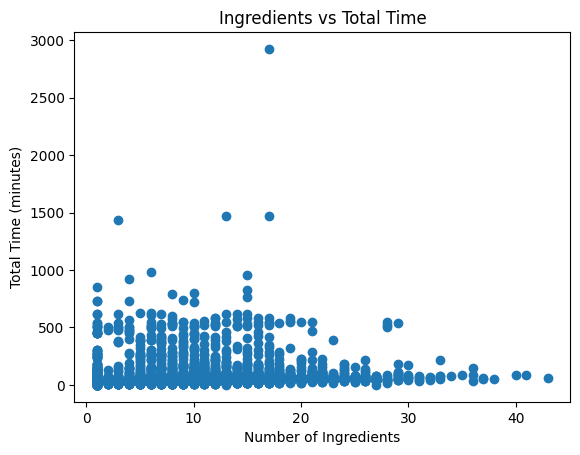

<Figure size 1000x400 with 0 Axes>

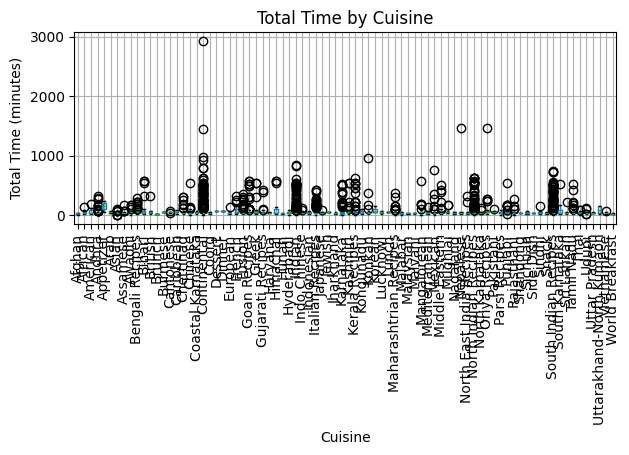

<Figure size 1000x400 with 0 Axes>

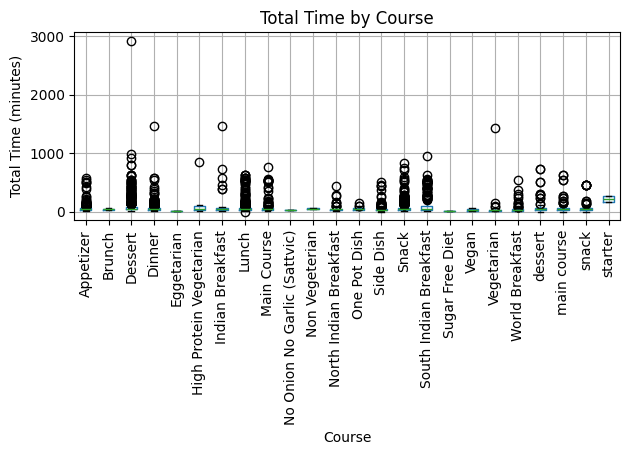

In [18]:
# Cell 10: Scatter & Box-plots for time vs. ingredient count
import matplotlib.pyplot as plt

# 1a. Compute ingredient count (adjust separator if needed)
indian_food_df['ingredient_count'] = indian_food_df['ingredients'].dropna().str.split(',').apply(len)

# Scatter: ingredient_count vs total_time
plt.figure()
plt.scatter(indian_food_df['ingredient_count'], indian_food_df['total_time'])
plt.xlabel('Number of Ingredients')
plt.ylabel('Total Time (minutes)')
plt.title('Ingredients vs Total Time')
plt.show()

# Box-plot: Total time by cuisine
plt.figure(figsize=(10,4))
indian_food_df.boxplot(column='total_time', by='cuisine', rot=90)
plt.suptitle('')
plt.xlabel('Cuisine')
plt.ylabel('Total Time (minutes)')
plt.title('Total Time by Cuisine')
plt.tight_layout()
plt.show()

# Box-plot: Total time by course
plt.figure(figsize=(10,4))
indian_food_df.boxplot(column='total_time', by='course', rot=90)
plt.suptitle('')
plt.xlabel('Course')
plt.ylabel('Total Time (minutes)')
plt.title('Total Time by Course')
plt.tight_layout()
plt.show()


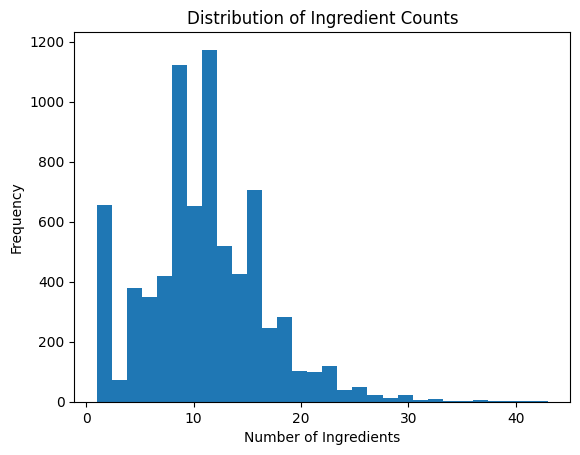

/tmp/ipykernel_110319/697635437.py:33: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_110319/697635437.py:33: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipykernel_110319/697635437.py:33: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_110319/697635437.py:33: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_110319/697635437.py:33: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_110319/697635437.py:33: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_110319/697635437.py:33: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from font(s) DejaVu Sans.
  plt.tight_layou

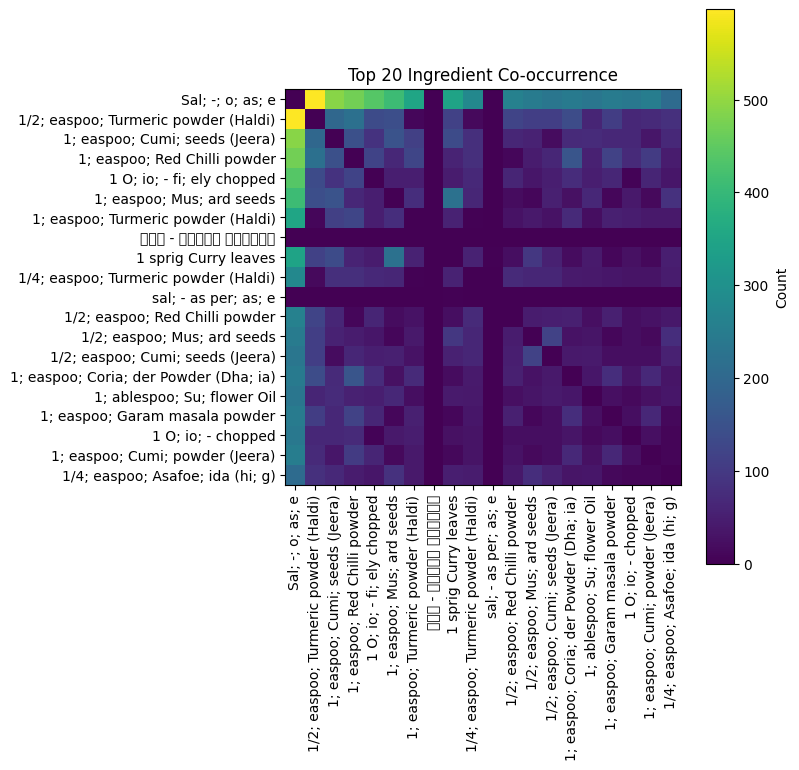

In [19]:
# Cell 11: Histogram of ingredient counts & co-occurrence heatmap
from collections import Counter
import numpy as np

# Histogram of ingredient counts
plt.figure()
indian_food_df['ingredient_count'].plot(kind='hist', bins=30)
plt.xlabel('Number of Ingredients')
plt.title('Distribution of Ingredient Counts')
plt.show()

# Build co-occurrence matrix for top 20 ingredients
ing_lists = indian_food_df['ingredients'].dropna().str.split(',').apply(lambda lst: [i.strip() for i in lst])
all_ings = [ing for sub in ing_lists for ing in sub]
top20 = [ing for ing, _ in Counter(all_ings).most_common(20)]

# Initialize matrix
co_occ = pd.DataFrame(np.zeros((20,20), int), index=top20, columns=top20)
for ings in ing_lists:
    for i in range(20):
        for j in range(i+1,20):
            if top20[i] in ings and top20[j] in ings:
                co_occ.iat[i,j] += 1
                co_occ.iat[j,i] += 1

# Heatmap
plt.figure(figsize=(8,8))
plt.imshow(co_occ, interpolation='nearest')
plt.xticks(range(20), top20, rotation=90)
plt.yticks(range(20), top20)
plt.title('Top 20 Ingredient Co-occurrence')
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()


In [35]:
# Cell 12: Interactive network graph (Final, with display fix)
import networkx as nx
from pyvis.network import Network

# --- Graph Creation ---
G = nx.Graph()
# Assuming 'top20' and 'co_occ' are defined from a previous cell
G.add_nodes_from(top20)
threshold = 50
for i in range(20):
    for j in range(i+1, 20):
        w = co_occ.iat[i, j]
        if w > threshold:
            G.add_edge(top20[i], top20[j], weight=int(w))

# --- DIAGNOSTIC STEP: Check if the graph is empty ---
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# If you see "0 edges", your threshold might be too high.
if G.number_of_edges() == 0:
    print("Warning: No edges were created. Your 'threshold' might be too high.")

# --- Set Node Sizes ---
for node in G.nodes():
    G.nodes[node]['size'] = G.degree(node) * 20

# --- Generate the Interactive Visualization (using the robust .show() method) ---
net = Network(notebook=True, height='800px', width='100%')
net.from_nx(G)
net.show_buttons(filter_=['physics'])

# This method is more reliable for displaying in notebooks
net.show('ingredient_network.html')

Graph created with 20 nodes and 87 edges.
ingredient_network.html


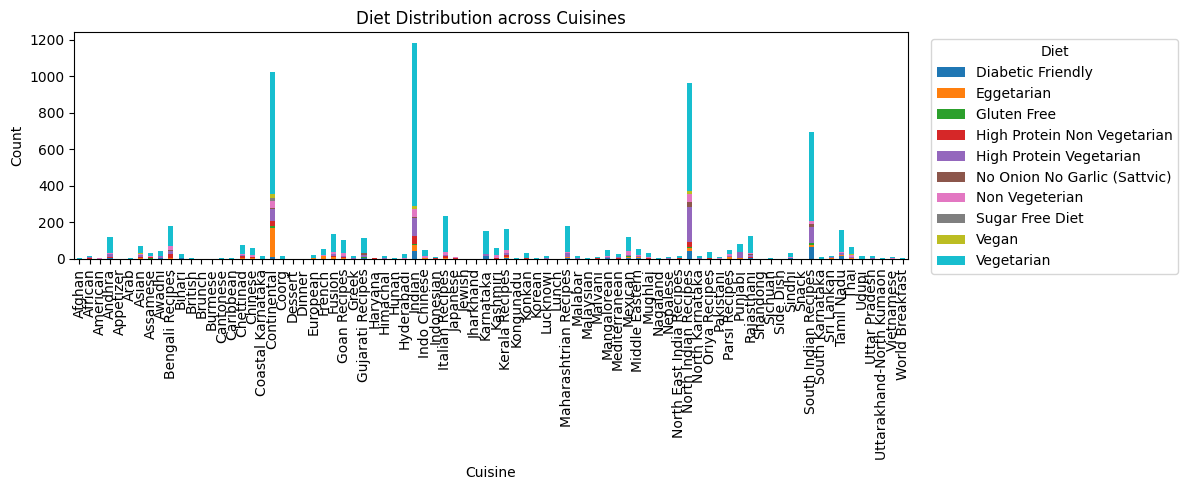

In [22]:
# Cell 13: Stacked bar chart of diet by cuisine
import matplotlib.pyplot as plt

ct = pd.crosstab(indian_food_df['cuisine'], indian_food_df['diet'])
ct.plot(kind='bar', stacked=True, figsize=(12,5))
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Diet Distribution across Cuisines')
plt.legend(title='Diet', bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()


In [28]:
# Cell 14: Sankey diagram (requires plotly)
import plotly.graph_objects as go

# Prepare labels
cuises = indian_food_df['cuisine'].astype('category')
courses = indian_food_df['course'].astype('category')
diets   = indian_food_df['diet'].astype('category')
labels = list(cuises.cat.categories) + list(courses.cat.categories) + list(diets.cat.categories)
label_idx = {lab:i for i,lab in enumerate(labels)}

# Cuisine→Course
src, tgt, val = [], [], []
for (cui,cour), cnt in indian_food_df.groupby(['cuisine','course']).size().items():
    src.append(label_idx[cui])
    tgt.append(label_idx[cour])
    val.append(cnt)
# Course→Diet
for (cour,di), cnt in indian_food_df.groupby(['course','diet']).size().items():
    src.append(label_idx[cour])
    tgt.append(label_idx[di])
    val.append(cnt)

fig = go.Figure(go.Sankey(node=dict(label=labels), link=dict(source=src, target=tgt, value=val)))
fig.update_layout(title_text="Cuisine → Course → Diet Sankey", font_size=10)
fig.show()


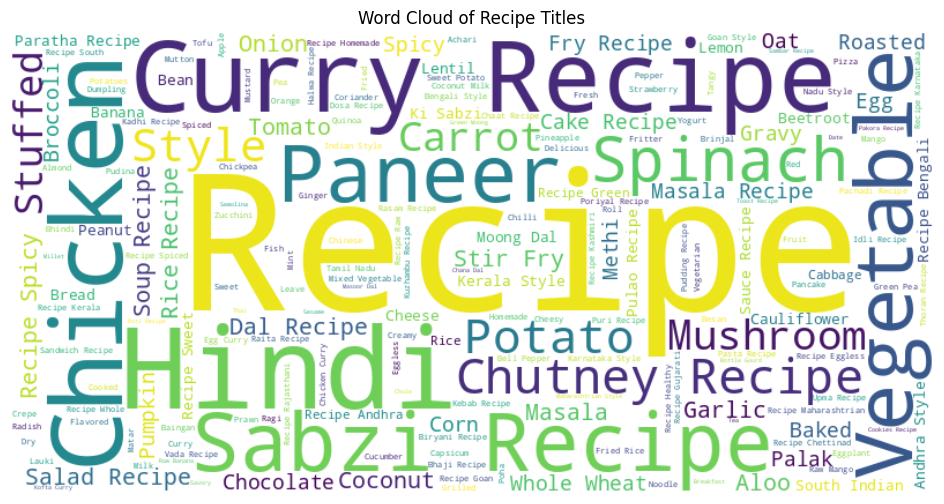

In [31]:
# Cell 15: Word cloud of recipe titles
from wordcloud import WordCloud

text = ' '.join(indian_food_df['name'].dropna().astype(str))
wc = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Recipe Titles')
plt.show()


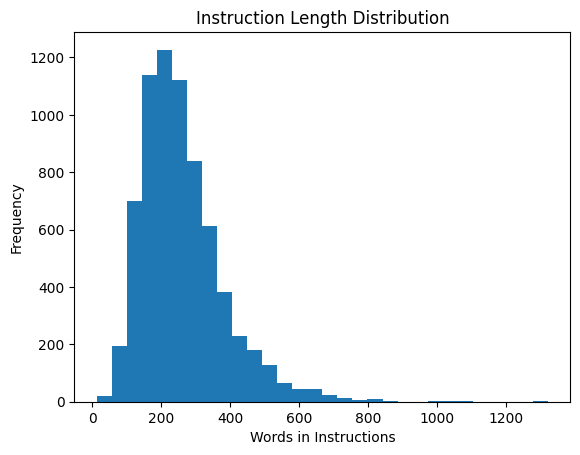

In [25]:
# Cell 16: Distribution of instruction length
indian_food_df['instruction_length'] = indian_food_df['instructions'].dropna().apply(lambda t: len(t.split()))
plt.figure()
indian_food_df['instruction_length'].plot(kind='hist', bins=30)
plt.xlabel('Words in Instructions')
plt.title('Instruction Length Distribution')
plt.show()


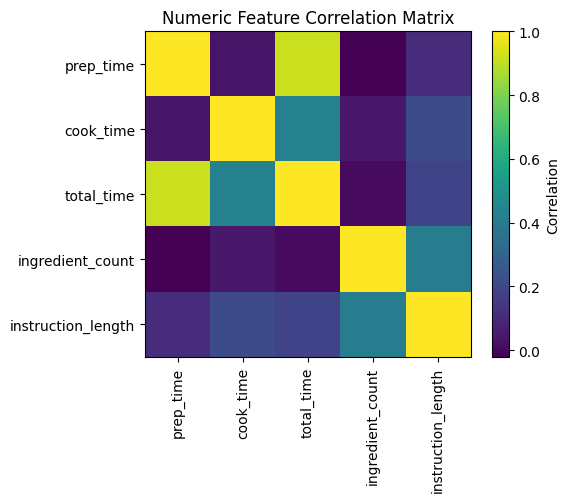

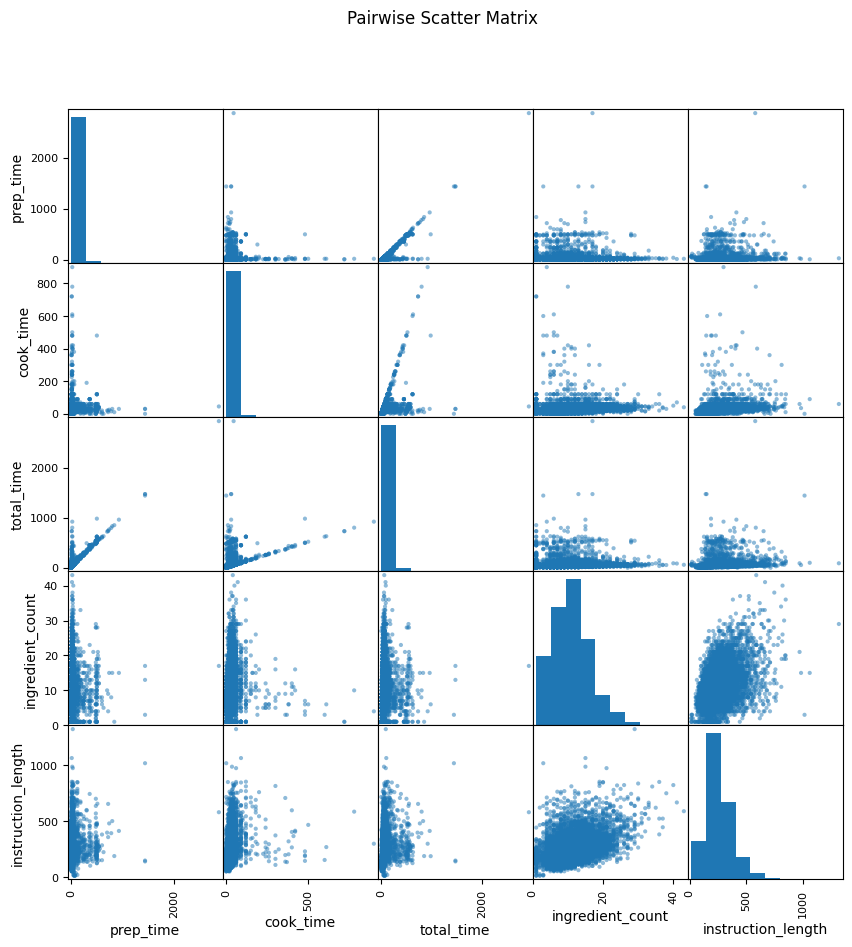

In [27]:
# Cell 18: Correlation matrix & pair-plot of numeric features
from pandas.plotting import scatter_matrix

# Select numeric cols present
num_cols = [c for c in ['prep_time','cook_time','total_time','ingredient_count','instruction_length'] if c in indian_food_df.columns]

# Corr heatmap
corr = indian_food_df[num_cols].corr()
plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar(label='Correlation')
plt.title('Numeric Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter matrix
scatter_matrix(indian_food_df[num_cols], figsize=(10,10), diagonal='hist')
plt.suptitle('Pairwise Scatter Matrix')
plt.show()
